In [41]:
#Устанавливаем все необходимые библиотеки для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation, Dropout
from numpy.random import seed

In [4]:
# Загружаем данные
df1 = pd.read_excel('X_bp.xlsx', index_col = 0)
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [5]:
df2 = pd.read_excel('X_nup.xlsx', index_col = 0)
df2

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


In [6]:
#Объединяем два файла в один Датасет
df = df1.merge(df2, left_index = True, right_index = True, how = 'inner')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [7]:
#Перечисляем все переменные с выбросами (все, кроме угла нашивки)
columns_drop = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
                 "Шаг нашивки","Плотность нашивки"]

In [8]:
#По всем столбцам, для которых есть выбросы, сделаем замену выбрасов на пустые значения
for x in columns_drop:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x]<min,x] = np.nan
    df.loc[df[x]>max,x] = np.nan

In [9]:
#Удаляем пустые значения
df = df.dropna(axis=0)

In [10]:
#Проверяем данные после удаления 
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [11]:
#Выписываем названия переменных
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [12]:
col = df.columns

In [13]:
#Нормализуем данные (приведем к диапазону [0,1])
minmaxscalar = preprocessing.MinMaxScaler()
col = df.columns
result = minmaxscalar.fit_transform(df)
data_norm = pd.DataFrame(result, columns=col)
data_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
932,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
933,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
934,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten
from keras.losses import SparseCategoricalCrossentropy

from numpy.random import seed

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
#Распределяем переменные
input_colnames_mod = ["Соотношение матрица-наполнитель",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_colnames_mod = ["Модуль упругости при растяжении, ГПа",
                       "Прочность при растяжении, МПа"]

in_train_mod = data_norm[input_colnames_mod] #Массив на вход
out_train_mod = data_norm[output_colnames_mod] #Массив на выход
out_train_mod

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,0.280303,0.712590
1,0.280303,0.712590
2,0.280303,0.712590
3,0.280303,0.712590
4,0.280303,0.712590
...,...,...
931,0.475147,0.463043
932,0.464422,0.452087
933,0.578740,0.575296
934,0.535142,0.334513


In [17]:
in_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  936 non-null    float64
 1   Плотность, кг/м3                 936 non-null    float64
 2   модуль упругости, ГПа            936 non-null    float64
 3   Количество отвердителя, м.%      936 non-null    float64
 4   Содержание эпоксидных групп,%_2  936 non-null    float64
 5   Температура вспышки, С_2         936 non-null    float64
 6   Поверхностная плотность, г/м2    936 non-null    float64
 7   Потребление смолы, г/м2          936 non-null    float64
 8   Угол нашивки, град               936 non-null    float64
 9   Шаг нашивки                      936 non-null    float64
 10  Плотность нашивки                936 non-null    float64
dtypes: float64(11)
memory usage: 80.6 KB


In [18]:
out_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Модуль упругости при растяжении, ГПа  936 non-null    float64
 1   Прочность при растяжении, МПа         936 non-null    float64
dtypes: float64(2)
memory usage: 14.8 KB


In [19]:
#Делим выборку на train, test
train1, test1, train2, test2 = train_test_split(in_train_mod, out_train_mod, test_size=0.3)

In [20]:
models = [LinearRegression(),          # метод наименьших квадратов 
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=123), # метод ближайших соседей
          SVR(kernel='linear'),        # метод опорных векторов с линейным ядром
          GradientBoostingRegressor()] #Метод градиентного бустинга

C:\Users\Маша\AppData\Local\Temp\ipykernel_15112\2194059679.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив


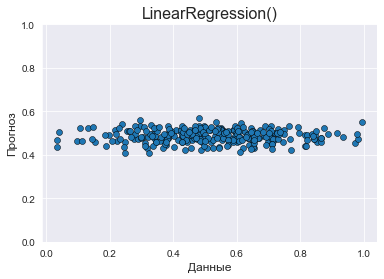

C:\Users\Маша\AppData\Local\Temp\ipykernel_15112\2194059679.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив


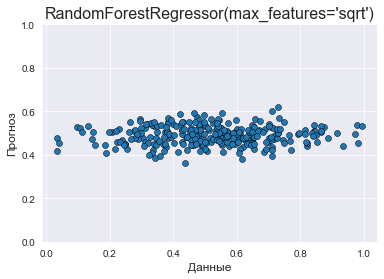

C:\Users\Маша\AppData\Local\Temp\ipykernel_15112\2194059679.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив


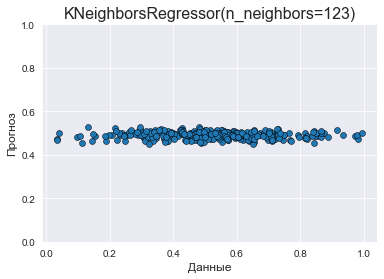

C:\Users\Маша\AppData\Local\Temp\ipykernel_15112\2194059679.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив


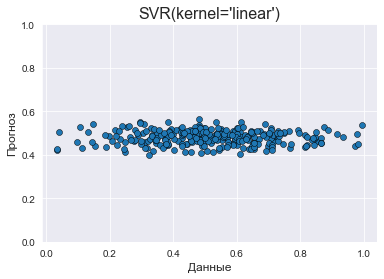

C:\Users\Маша\AppData\Local\Temp\ipykernel_15112\2194059679.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив


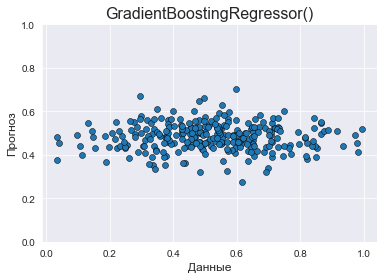

,R2_Y1,R2_Y2
Model,,
LinearRegression,-0.038473,-0.056049
RandomForestRegressor,-0.089025,-0.055812
KNeighborsRegressor,-0.001639,-0.038564
SVR,-0.038807,-0.075138
GradientBoostingRegressor,-0.115826,-0.148154


In [21]:
models_prov = pd.DataFrame() #создаем двумерный массив
models_results = pd.DataFrame()
tmp = {} #временный словарь
tmp2 = {}
for model in models:      #цикл перебора моделей
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    tmp2['Model'] = m[:m.index('(')]
    
    for i in range(train2.shape[1]): #цикл проверки модели
        model.fit(train1, train2[output_colnames_mod[i]])  #обучаем модель
        tmp['R2_Y%s'%str(i+1)] = r2_score(test2[output_colnames_mod[i]], model.predict(test1))#считаем коэффициент детерминации
        #Создадим датасет с тестовыми данными и прогнозными значениями для каждой модели
        tmp2 = pd.DataFrame({'Данные': test2[output_colnames_mod[i]],'Прогноз': model.predict(test1)})   
        
    models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив
    models_results = tmp2 
    #Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
    sns.set_style('darkgrid')
    plt.title( model, size=16)
    plt.xlabel('Данные',size=12)
    plt.ylabel('Прогноз',size=12)
    plt.ylim(0, 1)
    sns.scatterplot(x='Данные', y='Прогноз', data=models_results, edgecolor='black', palette='cubehelix')
    plt.show()
    
models_prov.set_index('Model', inplace=True) #делаем индекс по названию модели
models_prov

In [22]:
#Построение нейронной сети для "Соотношение матрица-наполнитель"
input_colnames = ["Плотность, кг/м3",
                  "модуль упругости, ГПа",
                  "Количество отвердителя, м.%",
                  "Содержание эпоксидных групп,%_2",
                  "Температура вспышки, С_2",
                  "Поверхностная плотность, г/м2",
                  "Потребление смолы, г/м2",
                  "Угол нашивки, град",
                  "Шаг нашивки",
                  "Плотность нашивки",
                  "Модуль упругости при растяжении, ГПа",
                  "Прочность при растяжении, МПа"]

output_colnames = ["Соотношение матрица-наполнитель"]

X_train = data_norm[input_colnames]
Y_train = data_norm[output_colnames]
X_train.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      936 non-null    float64
 1   модуль упругости, ГПа                 936 non-null    float64
 2   Количество отвердителя, м.%           936 non-null    float64
 3   Содержание эпоксидных групп,%_2       936 non-null    float64
 4   Температура вспышки, С_2              936 non-null    float64
 5   Поверхностная плотность, г/м2         936 non-null    float64
 6   Потребление смолы, г/м2               936 non-null    float64
 7   Угол нашивки, град                    936 non-null    float64
 8   Шаг нашивки                           936 non-null    float64
 9   Плотность нашивки                     936 non-null    float64
 10  Модуль упругости при растяжении, ГПа  936 non-null    float64
 11  Прочность при растя

In [24]:
#размер тестовой выборки 30% 
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X_train, Y_train, test_size=0.3) 

In [42]:
#Построение модкли
model = Sequential([
    Dense(12, activation = 'relu', input_dim=12),
    Dense(34, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1),
])

model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 dense_16 (Dense)            (None, 34)                442       
                                                                 
 dense_17 (Dense)            (None, 16)                560       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,303
Trainable params: 1,303
Non-trainable params: 0
_________________________________________________________________


In [43]:
#обучение модели
model.fit(Xtrn, Ytrn, epochs=500)

Epoch 1/500
21/21 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.0015
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 0.2005 - accuracy: 0.0000e+00
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.0015
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1598 - accuracy: 0.0000e+00
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.0015
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.0015
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.0015
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.0015
Epoch 9/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.0015
Epoch 10/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1509 - accuracy: 0.0015
E

21/21 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.0031
Epoch 83/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.0031
Epoch 84/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.0015
Epoch 85/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1362 - accuracy: 0.0031
Epoch 86/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.0031
Epoch 87/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.0031
Epoch 88/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.0031
Epoch 89/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.0031
Epoch 90/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.0031
Epoch 91/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.0031
Epoch 92/500


21/21 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.0015
Epoch 164/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.0031
Epoch 165/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.0031
Epoch 166/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.0031
Epoch 167/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.0031
Epoch 168/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.0015
Epoch 169/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1143 - accuracy: 0.0031
Epoch 170/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.0031
Epoch 171/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.0031
Epoch 172/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.0031
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.0031
Epoch 245/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1003 - accuracy: 0.0031
Epoch 246/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.0031
Epoch 247/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.0031
Epoch 248/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.0031
Epoch 249/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.0031
Epoch 250/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.0031
Epoch 251/500
21/21 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.0031
Epoch 252/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.0031
Epoch 253/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.0031
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.0031
Epoch 326/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.0031
Epoch 327/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.0031
Epoch 328/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.0031
Epoch 329/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.0031
Epoch 330/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.0031
Epoch 331/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.0031
Epoch 332/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.0031
Epoch 333/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.0031
Epoch 334/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.0031
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.0031
Epoch 407/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.0031
Epoch 408/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.0031
Epoch 409/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.0031
Epoch 410/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.0031
Epoch 411/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.0031
Epoch 412/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.0031
Epoch 413/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.0031
Epoch 414/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.0031
Epoch 415/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.0031
Epoc

21/21 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.0031
Epoch 488/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.0031
Epoch 489/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.0031
Epoch 490/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.0031
Epoch 491/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.0031
Epoch 492/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.0031
Epoch 493/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.0031
Epoch 494/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.0031
Epoch 495/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.0031
Epoch 496/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.0031
Epoc

In [44]:
#проверяем на тестовом множестве
model.evaluate(Xtest, Ytest) 

9/9 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.0000e+00


[0.19051124155521393, 0.0]

In [45]:
#Сохранили модель
model.save("my_model3")

INFO:tensorflow:Assets written to: my_model3\assets


In [46]:
#получаем предсказанные данные
predict_model =  model.predict(Xtest) 
#превращаем в многомерный массив
predict_values = np.ravel(predict_model) 
predict_values

array([0.42086288, 0.4405519 , 0.3393737 , 0.600438  , 0.48610616,
       0.54545903, 0.595973  , 0.43029076, 0.5550647 , 0.66567886,
       0.26558736, 0.589891  , 0.66904134, 0.41437224, 0.52435315,
       0.42952436, 0.46245345, 0.50882626, 0.4053874 , 0.49139228,
       0.45775074, 0.5539158 , 0.53150636, 0.55000085, 0.5946184 ,
       0.6457041 , 0.2940338 , 0.6176766 , 0.6523156 , 0.43135032,
       0.6571427 , 0.6308525 , 0.5165205 , 0.37313804, 0.12634574,
       0.39103648, 0.5210957 , 0.5019742 , 0.46799666, 0.47853827,
       0.38866886, 0.75454944, 0.48718   , 0.66967934, 0.52885664,
       0.5079532 , 0.83321506, 0.5655502 , 0.4174748 , 0.5886798 ,
       0.5370899 , 0.609224  , 0.4116569 , 0.47414583, 0.58903414,
       0.25141615, 0.57737255, 0.19535837, 0.34510472, 0.54786724,
       0.71468586, 0.499936  , 0.5028469 , 0.4364559 , 0.5137147 ,
       0.50932944, 0.5378179 , 0.45995995, 0.48362455, 0.5656316 ,
       0.8268953 , 0.5721849 , 0.2942895 , 0.4764928 , 0.64610

In [47]:
Ytest_values = np.ravel(Ytest.copy())
Ytest_values

array([0.67218887, 0.64427654, 0.44902649, 0.43534951, 0.80390985,
       0.6370491 , 0.20943329, 0.25068183, 0.44346251, 0.44877668,
       0.49738218, 0.44821663, 0.51327571, 0.54894691, 0.49056468,
       0.30048359, 0.51022375, 0.4861123 , 0.43898646, 0.31558573,
       0.25845506, 0.78919654, 0.39667785, 0.57176215, 0.57745177,
       0.73268306, 0.56407793, 0.58405689, 0.51124348, 0.66382394,
       0.48900859, 0.45330127, 0.77349975, 0.58877696, 0.30499648,
       0.2780445 , 0.58993003, 0.49283921, 0.26847641, 0.19635184,
       0.73969705, 0.06882392, 0.61636011, 0.38933935, 0.81124932,
       0.45763333, 0.23905041, 0.29241683, 0.42423624, 0.72359562,
       0.55139715, 0.31336253, 0.22043991, 0.69594033, 0.16242189,
       0.3356657 , 0.51350131, 0.51232931, 0.51184163, 0.26846655,
       0.47404127, 0.47688232, 0.67164604, 0.2518463 , 0.43125952,
       0.51608183, 0.78136755, 0.39385455, 0.67631025, 0.57906769,
       0.71389497, 0.22043991, 0.80941066, 0.31233963, 0.07981

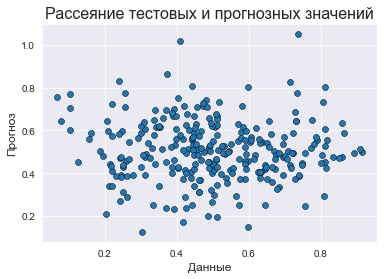

,Данные,Прогноз
0,0.672189,0.420863
1,0.644277,0.440552
2,0.449026,0.339374
3,0.435350,0.600438
4,0.803910,0.486106
...,...,...
276,0.665364,0.361158
277,0.371694,0.694366
278,0.501526,0.550379
279,0.244507,0.382678


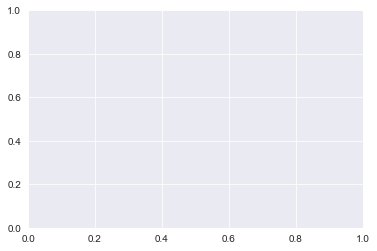

In [48]:
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': Ytest_values,'Прогноз': predict_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
plt.ylim(0, 1)
feature_results